In [1]:
import os
import glob
import sys

# --- 0. 關鍵修復：禁用 Qt OpenGL 整合 ---
# 這是為了解決 WSL2 中 Intel 驅動 (libigc.so) 與 TensorFlow 的 LLVM 版本衝突導致的 Segfault
# 必須在導入 PyQt5 之前設定
os.environ['QT_XCB_GL_INTEGRATION'] = 'none'

# --- 解決 Jupyter Kernel 崩潰問題 ---
# 在導入 TensorFlow 之前，強制將 conda 環境中的 NVIDIA 函式庫路徑加入 LD_LIBRARY_PATH
# 這解決了 "Cannot dlopen some GPU libraries" 導致的 Segfault (核心崩潰)

try:
    # 1. 嘗試獲取 Conda 環境路徑
    conda_prefix = os.environ.get('CONDA_PREFIX')
    
    # 如果沒有 CONDA_PREFIX，嘗試從 sys.executable 推斷 (例如 /home/user/miniconda3/envs/moon_gpu/bin/python)
    if not conda_prefix:
        conda_prefix = os.path.dirname(os.path.dirname(sys.executable))
    
    if conda_prefix:
        # 2. 尋找所有 nvidia 相關的 lib 目錄
        nvidia_lib_pattern = os.path.join(conda_prefix, 'lib', 'python3.10', 'site-packages', 'nvidia', '*', 'lib')
        nvidia_libs = glob.glob(nvidia_lib_pattern)
        
        if nvidia_libs:
            # 3. 組合路徑
            nvidia_path_str = ':'.join(nvidia_libs)
            current_ld_path = os.environ.get('LD_LIBRARY_PATH', '')
            
            # 4. 設定環境變數 (這必須在 import tensorflow 之前完成)
            os.environ['LD_LIBRARY_PATH'] = f"{nvidia_path_str}:{current_ld_path}"
            print(f"✅ 已自動設定 NVIDIA 函式庫路徑 ({len(nvidia_libs)} 個目錄)")
        else:
            print("⚠️ 未找到 NVIDIA 函式庫，如果 GPU 無法使用請檢查安裝")
    else:
        print("⚠️ 無法偵測 Conda 環境，跳過路徑修復")

except Exception as e:
    print(f"⚠️ 路徑修復時發生錯誤: {e}")

# --- 接下來正常導入 ---
import tensorflow as tf
print(f"TensorFlow Version: {tf.__version__}")

✅ 已自動設定 NVIDIA 函式庫路徑 (11 個目錄)


I0000 00:00:1765609185.410529    9553 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
I0000 00:00:1765609185.895482    9553 cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI AVX_VNNI_INT8 AVX_NE_CONVERT FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
I0000 00:00:1765609187.771392    9553 port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


TensorFlow Version: 2.21.0-dev20251208


In [2]:
import sys
import os
import tensorflow as tf
# 確認工作目錄
current_dir = os.getcwd()
print(f"Current working directory: {current_dir}")

# 確保專案根目錄在 sys.path 中 (通常預設就在，但為了保險起見)
if current_dir not in sys.path:
    sys.path.append(current_dir)
    print(f"Added {current_dir} to sys.path")

# 注意：我們不再將 'src' 加入 sys.path，因為我們現在使用 'from src.xxx import yyy' 的方式
# 這樣可以避免模組名稱衝突並保持結構清晰

print("TensorFlow Version:", tf.__version__)

# 列出實體 GPU
gpus = tf.config.list_physical_devices('GPU')
print(f"Num GPUs Available: {len(gpus)}")

if gpus:
    details = tf.config.experimental.get_device_details(gpus[0])
    print(f"GPU Name: {details.get('device_name', 'Unknown')}")
    print("GPU Setup Success! Ready for training.")
else:
    print("No GPU found. Please check nvidia-smi.")

Current working directory: /home/bruh_bruh/moon_doodle_project
Added /home/bruh_bruh/moon_doodle_project to sys.path
TensorFlow Version: 2.21.0-dev20251208
Num GPUs Available: 1
GPU Name: NVIDIA GeForce RTX 5070 Ti Laptop GPU
GPU Setup Success! Ready for training.


W0000 00:00:1765609191.058261    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765609191.586705    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765609191.586879    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765609191.586890    9553 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1765609191.587381    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not us

# -1.Pre-train your model(should do it VERY carefully！！！)

In [4]:
from src.train_alphazero import train_with_greedy

# 執行預訓練
# num_games: 生成多少場 Greedy 對局 (建議 100-500)
# epochs: 在這些數據上訓練幾輪 (建議 5-10)
train_with_greedy(num_games=100, epochs=5)

Using Linux native path for models: /home/bruh_bruh/moon_doodle_project
Initializing AlphaZero AI for Pre-training...
Creating new model


W0000 00:00:1765560464.278849   29240 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765560464.279173   29240 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765560464.279457   29240 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765560464.279467   29240 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1765560464.432737   29240 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not us

Starting Pre-training: 100 games, 5 epochs
Generating 100 symmetric games using Greedy AI...
Game finished. Winner: P2, Score: 161-169
Game finished. Winner: P2, Score: 129-260
Game finished. Winner: P1, Score: 86-83
Game finished. Winner: P1, Score: 105-68
Game finished. Winner: P2, Score: 52-58
Game finished. Winner: P1, Score: 155-88
Game finished. Winner: P2, Score: 266-315
Game finished. Winner: P2, Score: 145-171
Game finished. Winner: P1, Score: 501-225
Game finished. Winner: P2, Score: 91-159
Game finished. Winner: P1, Score: 168-113
Game finished. Winner: P1, Score: 145-128
Game finished. Winner: P2, Score: 316-575
Game finished. Winner: P2, Score: 87-109
Game finished. Winner: P2, Score: 94-118
Game finished. Winner: P1, Score: 87-85
Game finished. Winner: P2, Score: 47-79
Game finished. Winner: P2, Score: 76-120
Game finished. Winner: P2, Score: 37-51
Game finished. Winner: P2, Score: 62-79
Game finished. Winner: P1, Score: 171-101
Game finished. Winner: P2, Score: 114-158
G

I0000 00:00:1765560466.943327   29371 service.cc:153] XLA service 0x70e468007d40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765560466.943350   29371 service.cc:161]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti Laptop GPU, Compute Capability 12.0a
I0000 00:00:1765560466.980225   29371 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1765560467.212451   29371 cuda_dnn.cc:461] Loaded cuDNN version 91700
I0000 00:00:1765560467.861429   29457 subprocess_compilation.cc:348] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1765560467.972798   29457 subprocess_compilation.cc:348] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 12 bytes spill stores, 12 bytes spill loads



 69/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5.5977 - policy_loss: 4.0518 - value_loss: 1.5459

I0000 00:00:1765560471.284713   29371 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


600/600 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 4.7208 - policy_loss: 3.5674 - value_loss: 1.1533
Epoch 2/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.2598 - policy_loss: 3.3876 - value_loss: 0.8722
Epoch 3/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.0938 - policy_loss: 3.3480 - value_loss: 0.7458
Epoch 4/5
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.9657 - policy_loss: 3.3228 - value_loss: 0.6429
Epoch 5/5
600/600 ━━━━━━━━━━━━━━━━━━━━ -1s -1271us/step - loss: 3.8570 - policy_loss: 3.3011 - value_loss: 0.5559


01:27:56 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


Pre-trained model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5


## 1. 啟動遊戲 (PvP / PvAI)
執行下方儲存格以開啟遊戲視窗。

In [6]:
import sys
from PyQt5.QtWidgets import QApplication
from src.New_moon_game import MainWindow
from src.ai_logic import GreedyAI, AlphazeroAI
import os

# 確保只有一個 QApplication 實例
app = QApplication.instance()
if app is None:
    app = QApplication(sys.argv)

# 設定 AI (可選)
# P2 使用 AlphaZero (如果模型存在)，否則使用 GreedyAI
model_path = os.path.join(current_dir, 'models', 'alphazero_model.h5')
if os.path.exists(model_path):
    print("Loading AlphaZero AI...")
    # 注意：這裡需要知道 input_dim 和 num_actions，通常從 train_alphazero 導入或寫死
    # 為了簡化，這裡假設使用預設地圖 (Large)
    from src.adj_map import DEFAULT_BOARD
    NUM_NODES = len(DEFAULT_BOARD.adj_map)
    INPUT_DIM = 12 * NUM_NODES + 27
    NUM_ACTIONS = 3 * NUM_NODES
else:
    print("Model not found")

# AlphazeroAI('AlphaZero', model_path=model_path, num_actions=NUM_ACTIONS)
ai_players = {
    'P2': GreedyAI("greebot")
}

window = MainWindow(ai_players=ai_players)
window.show()

# 在 Notebook 中執行 PyQt5 事件迴圈
app.exec_()

Loading AlphaZero AI...


0

## 2. 視覺化訓練 (Training with UI)
執行下方儲存格以開啟訓練視窗，即時觀看 AlphaZero 自我對戰與學習過程。

In [4]:
import sys
from PyQt5.QtWidgets import QApplication
from src.train_with_ui import TrainingWindow

app = QApplication.instance()
if app is None:
    app = QApplication(sys.argv)

train_window = TrainingWindow()
train_window.show()

app.exec_()

Initializing AlphaZero AI...
Loading model from c:\Users\tobyy\Desktop\moon_doodle_project\models\alphazero_model.h5

We could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 1, 27), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>',)
  • kwargs={'mask': 'None'}). Rebuilding model and loading weights...
Weights loaded successfully.
Loaded history: starting from epoch 53

=== Epoch 54/1000 ===
Starting self-play game 1/2
Game finished. Winner: P2, Score: 15-17
Starting self-play game 2/2
Game finished. Winner: P1, Score: 24-18
Training on 48 samples...
Epoch 1/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 4.3453 - policy_loss: 3.1538 - value_loss: 1.1915
Epoch 2/2
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 3.8681 - policy_loss: 3.0054 - value_loss: 0.8627


01:57:02 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 4.1067 (Policy: 3.0796, Value: 1.0271)
Model saved to c:\Users\tobyy\Desktop\moon_doodle_project\models\alphazero_model.h5
History saved to c:\Users\tobyy\Desktop\moon_doodle_project\models\training_history.pkl

=== Epoch 55/1000 ===
Starting self-play game 1/2


0

## 3. 背景訓練 (Headless Training)
如果不想要 UI，可以直接執行背景訓練腳本。

In [3]:
from src.train_alphazero import train
# 開始訓練 (會佔用此 Kernel 直到手動停止)
train()

Using Linux native path for models: /home/bruh_bruh/moon_doodle_project
Initializing AlphaZero AI...
Loading model from /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5


W0000 00:00:1765609201.781528    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765609201.781817    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765609201.782030    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not used by the device.
W0000 00:00:1765609201.782038    9553 gpu_device.cc:2456] TensorFlow was not built with CUDA kernel binaries compatible with compute capability 12.0a. CUDA kernels will be jit-compiled from PTX, which could take 30 minutes or longer.
W0000 00:00:1765609201.924149    9553 cuda_executor.cc:1840] GPU interconnect information not available: INTERNAL: NVML doesn't support extracting fabric info or NVLink is not us


We could not automatically infer the shape of the Lambda's output. Please specify the `output_shape` argument for this Lambda layer.

Arguments received by Lambda.call():
  • args=('<KerasTensor shape=(None, 1, 29), dtype=float32, sparse=False, ragged=False, name=keras_tensor_1>',)
  • kwargs={'mask': 'None'}). Rebuilding model and loading weights...
Weights loaded successfully.
Loaded history: starting from epoch 52

=== Epoch 53/1000 ===
Starting self-play game 1/5


I0000 00:00:1765609202.799510    9691 service.cc:153] XLA service 0x7d8750030050 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1765609202.799530    9691 service.cc:161]   StreamExecutor device (0): NVIDIA GeForce RTX 5070 Ti Laptop GPU, Compute Capability 12.0a
I0000 00:00:1765609202.815192    9691 dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1765609202.859744    9691 cuda_dnn.cc:461] Loaded cuDNN version 91700
I0000 00:00:1765609203.905302    9691 device_compiler.h:208] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Game finished. Winner: P2, Score: 6-19
Starting self-play game 2/5
Game finished. Winner: P2, Score: 15-22
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 14-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-20
Training on 960 samples (Buffer: 1 batches)...
Epoch 1/3


I0000 00:00:1765609215.217161    9892 subprocess_compilation.cc:348] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 12 bytes spill stores, 12 bytes spill loads

I0000 00:00:1765609215.386804    9889 subprocess_compilation.cc:348] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3', 4 bytes spill stores, 4 bytes spill loads



30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 4.2037 - policy_loss: 3.4136 - value_loss: 0.7901
Epoch 2/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4698 - policy_loss: 3.3664 - value_loss: 0.1034
Epoch 3/3
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3703 - policy_loss: 3.3271 - value_loss: 0.0432


15:00:18 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.6813 (Policy: 3.3690, Value: 0.3122)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 54/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-23
Starting self-play game 2/5
Game finished. Winner: P2, Score: 8-13
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-6
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-23
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-17
Training on 1920 samples (Buffer: 2 batches)...
Epoch 1/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6302 - policy_loss: 3.3418 - value_loss: 0.2883
Epoch 2/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3554 - policy_loss: 3.3143 - value_loss: 0.0411
Epoch 3/3
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3088 - policy_loss: 3.2879 - value_loss: 0.0209


15:00:29 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4315 (Policy: 3.3147, Value: 0.1168)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 55/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 13-14
Starting self-play game 2/5
Game finished. Winner: P2, Score: 15-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 10-20
Starting self-play game 4/5
Game finished. Winner: P1, Score: 20-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-16
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5005 - policy_loss: 3.3055 - value_loss: 0.1949
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3341 - policy_loss: 3.2783 - value_loss: 0.0558
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2789 - policy_loss: 3.2478 - value_loss: 0.0312


15:00:40 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3712 (Policy: 3.2772, Value: 0.0940)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 56/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 15-21
Starting self-play game 2/5
Game finished. Winner: P2, Score: 13-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-15
Starting self-play game 4/5
Game finished. Winner: P2, Score: 12-22
Starting self-play game 5/5
Game finished. Winner: P2, Score: 17-20
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4582 - policy_loss: 3.2955 - value_loss: 0.1628
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3056 - policy_loss: 3.2707 - value_loss: 0.0348
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2739 - policy_loss: 3.2432 - value_loss: 0.0307


15:00:51 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3459 (Policy: 3.2698, Value: 0.0761)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 57/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 17-19
Starting self-play game 2/5
Game finished. Winner: P2, Score: 7-10
Starting self-play game 3/5
Game finished. Winner: P2, Score: 6-17
Starting self-play game 4/5
Game finished. Winner: P2, Score: 17-24
Starting self-play game 5/5
Game finished. Winner: P1, Score: 27-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4804 - policy_loss: 3.3010 - value_loss: 0.1793
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3300 - policy_loss: 3.2681 - value_loss: 0.0619
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2762 - policy_loss: 3.2433 - value_loss: 0.0329


15:01:01 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3622 (Policy: 3.2708, Value: 0.0914)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 58/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-13
Starting self-play game 2/5
Game finished. Winner: P2, Score: 16-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 15-18
Starting self-play game 4/5
Game finished. Winner: P2, Score: 22-24
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5590 - policy_loss: 3.3174 - value_loss: 0.2416
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3582 - policy_loss: 3.2819 - value_loss: 0.0763
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3042 - policy_loss: 3.2593 - value_loss: 0.0449


15:01:11 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4071 (Policy: 3.2862, Value: 0.1209)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 59/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 16-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 18-27
Starting self-play game 3/5
Game finished. Winner: P2, Score: 23-24
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-23
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-26
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5043 - policy_loss: 3.3056 - value_loss: 0.1987
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3264 - policy_loss: 3.2679 - value_loss: 0.0584
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2928 - policy_loss: 3.2557 - value_loss: 0.0371


15:01:22 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3745 (Policy: 3.2764, Value: 0.0981)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 60/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 27-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 14-15
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-17
Starting self-play game 4/5
Game finished. Winner: P2, Score: 6-24
Starting self-play game 5/5
Game finished. Winner: P2, Score: 17-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4826 - policy_loss: 3.2982 - value_loss: 0.1843
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3060 - policy_loss: 3.2648 - value_loss: 0.0412
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2749 - policy_loss: 3.2429 - value_loss: 0.0320


15:01:31 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3545 (Policy: 3.2686, Value: 0.0859)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 61/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-22
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4500 - policy_loss: 3.2880 - value_loss: 0.1621
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2901 - policy_loss: 3.2556 - value_loss: 0.0345
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2481 - policy_loss: 3.2286 - value_loss: 0.0195


15:01:43 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3294 (Policy: 3.2574, Value: 0.0720)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 62/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-18
Starting self-play game 2/5
Game finished. Winner: Draw, Score: 21-21
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-18
Starting self-play game 4/5
Game finished. Winner: P2, Score: 14-20
Starting self-play game 5/5
Game finished. Winner: P1, Score: 8-1
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4205 - policy_loss: 3.2808 - value_loss: 0.1398
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3106 - policy_loss: 3.2439 - value_loss: 0.0667
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2467 - policy_loss: 3.2101 - value_loss: 0.0367


15:01:53 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3260 (Policy: 3.2449, Value: 0.0810)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 63/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 15-17
Starting self-play game 2/5
Game finished. Winner: P1, Score: 20-14
Starting self-play game 3/5
Game finished. Winner: P1, Score: 27-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 7-17
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4440 - policy_loss: 3.2998 - value_loss: 0.1442
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3209 - policy_loss: 3.2648 - value_loss: 0.0561
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2747 - policy_loss: 3.2339 - value_loss: 0.0407


15:02:04 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3465 (Policy: 3.2662, Value: 0.0803)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 64/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 5-20
Starting self-play game 2/5
Game finished. Winner: P2, Score: 15-16
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-20
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-25
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5036 - policy_loss: 3.3017 - value_loss: 0.2019
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3384 - policy_loss: 3.2685 - value_loss: 0.0699
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2802 - policy_loss: 3.2422 - value_loss: 0.0380


15:02:14 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3741 (Policy: 3.2708, Value: 0.1032)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 65/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-18
Starting self-play game 4/5
Game finished. Winner: P2, Score: 4-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5091 - policy_loss: 3.2992 - value_loss: 0.2099
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3154 - policy_loss: 3.2669 - value_loss: 0.0486
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2927 - policy_loss: 3.2430 - value_loss: 0.0497


15:02:25 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3724 (Policy: 3.2697, Value: 0.1027)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 66/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-25
Starting self-play game 2/5
Game finished. Winner: P2, Score: 10-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 6-10
Starting self-play game 4/5
Game finished. Winner: P2, Score: 3-9
Starting self-play game 5/5
Game finished. Winner: P2, Score: 14-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4910 - policy_loss: 3.2932 - value_loss: 0.1977
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3137 - policy_loss: 3.2649 - value_loss: 0.0488
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2626 - policy_loss: 3.2323 - value_loss: 0.0303


15:02:35 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3558 (Policy: 3.2635, Value: 0.0923)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 67/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 22-13
Starting self-play game 2/5
Game finished. Winner: P2, Score: 13-23
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-24
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4358 - policy_loss: 3.2910 - value_loss: 0.1448
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2851 - policy_loss: 3.2493 - value_loss: 0.0359
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2431 - policy_loss: 3.2192 - value_loss: 0.0239


15:02:46 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3213 (Policy: 3.2532, Value: 0.0682)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 68/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-30
Starting self-play game 2/5
Game finished. Winner: P2, Score: 8-10
Starting self-play game 3/5
Game finished. Winner: P1, Score: 25-11
Starting self-play game 4/5
Game finished. Winner: P2, Score: 20-23
Starting self-play game 5/5
Game finished. Winner: P2, Score: 16-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4374 - policy_loss: 3.2710 - value_loss: 0.1664
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2912 - policy_loss: 3.2352 - value_loss: 0.0560
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2509 - policy_loss: 3.2060 - value_loss: 0.0449


15:02:56 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3265 (Policy: 3.2374, Value: 0.0891)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 69/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 13-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 10-28
Starting self-play game 3/5
Game finished. Winner: P2, Score: 16-19
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-20
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-29
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4815 - policy_loss: 3.2994 - value_loss: 0.1821
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3128 - policy_loss: 3.2560 - value_loss: 0.0567
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2758 - policy_loss: 3.2302 - value_loss: 0.0456


15:03:07 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3567 (Policy: 3.2619, Value: 0.0948)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 70/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 25-11
Starting self-play game 2/5
Game finished. Winner: P2, Score: 8-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-7
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-17
Starting self-play game 5/5
Game finished. Winner: P2, Score: 12-24
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4396 - policy_loss: 3.2892 - value_loss: 0.1504
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3006 - policy_loss: 3.2625 - value_loss: 0.0382
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2559 - policy_loss: 3.2299 - value_loss: 0.0259


15:03:17 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3320 (Policy: 3.2605, Value: 0.0715)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 71/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-26
Starting self-play game 2/5
Game finished. Winner: P1, Score: 16-6
Starting self-play game 3/5
Game finished. Winner: P2, Score: 8-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 3-16
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5099 - policy_loss: 3.2849 - value_loss: 0.2250
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3126 - policy_loss: 3.2584 - value_loss: 0.0542
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2636 - policy_loss: 3.2288 - value_loss: 0.0349


15:03:27 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3621 (Policy: 3.2573, Value: 0.1047)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 72/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 4-10
Starting self-play game 2/5
Game finished. Winner: P2, Score: 13-16
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-9
Starting self-play game 4/5
Game finished. Winner: P1, Score: 22-13
Starting self-play game 5/5
Game finished. Winner: Draw, Score: 9-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4777 - policy_loss: 3.2792 - value_loss: 0.1985
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3183 - policy_loss: 3.2527 - value_loss: 0.0656
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2573 - policy_loss: 3.2188 - value_loss: 0.0385


15:03:38 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3511 (Policy: 3.2502, Value: 0.1009)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 73/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-11
Starting self-play game 2/5
Game finished. Winner: P2, Score: 8-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-20
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 8-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4371 - policy_loss: 3.2940 - value_loss: 0.1431
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3089 - policy_loss: 3.2611 - value_loss: 0.0478
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2791 - policy_loss: 3.2391 - value_loss: 0.0400


15:03:48 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3417 (Policy: 3.2648, Value: 0.0770)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 74/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 13-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-13
Starting self-play game 3/5
Game finished. Winner: P1, Score: 16-12
Starting self-play game 4/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 18-19
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5045 - policy_loss: 3.3112 - value_loss: 0.1933
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3366 - policy_loss: 3.2812 - value_loss: 0.0554
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2964 - policy_loss: 3.2565 - value_loss: 0.0399


15:03:58 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3791 (Policy: 3.2830, Value: 0.0962)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 75/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-11
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-7
Starting self-play game 3/5
Game finished. Winner: P2, Score: 17-19
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-18
Starting self-play game 5/5
Game finished. Winner: P1, Score: 16-8
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5540 - policy_loss: 3.3208 - value_loss: 0.2332
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3454 - policy_loss: 3.2918 - value_loss: 0.0536
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3110 - policy_loss: 3.2659 - value_loss: 0.0451


15:04:09 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4035 (Policy: 3.2929, Value: 0.1106)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 76/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 16-8
Starting self-play game 2/5
Game finished. Winner: P2, Score: 7-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 18-25
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 22-22
Starting self-play game 5/5
Game finished. Winner: P2, Score: 16-32
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4785 - policy_loss: 3.2928 - value_loss: 0.1857
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3177 - policy_loss: 3.2615 - value_loss: 0.0562
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2767 - policy_loss: 3.2379 - value_loss: 0.0388


15:04:19 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3576 (Policy: 3.2641, Value: 0.0936)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 77/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 17-8
Starting self-play game 2/5
Game finished. Winner: P1, Score: 23-11
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 19-21
Starting self-play game 5/5
Game finished. Winner: P2, Score: 8-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4169 - policy_loss: 3.2819 - value_loss: 0.1349
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2842 - policy_loss: 3.2471 - value_loss: 0.0371
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2492 - policy_loss: 3.2198 - value_loss: 0.0294


15:04:29 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3168 (Policy: 3.2496, Value: 0.0672)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 78/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 22-25
Starting self-play game 2/5
Game finished. Winner: P1, Score: 14-10
Starting self-play game 3/5
Game finished. Winner: Draw, Score: 19-19
Starting self-play game 4/5
Game finished. Winner: P1, Score: 19-17
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4231 - policy_loss: 3.2709 - value_loss: 0.1522
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2986 - policy_loss: 3.2437 - value_loss: 0.0549
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2607 - policy_loss: 3.2204 - value_loss: 0.0403


15:04:40 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3275 (Policy: 3.2450, Value: 0.0825)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 79/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 14-20
Starting self-play game 2/5
Game finished. Winner: P2, Score: 13-23
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-25
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-20
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-11
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5007 - policy_loss: 3.2782 - value_loss: 0.2225
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3102 - policy_loss: 3.2562 - value_loss: 0.0540
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2726 - policy_loss: 3.2291 - value_loss: 0.0436


15:04:50 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3612 (Policy: 3.2545, Value: 0.1067)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 80/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-30
Starting self-play game 2/5
Game finished. Winner: P1, Score: 22-6
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-15
Starting self-play game 5/5
Game finished. Winner: P1, Score: 9-3
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4378 - policy_loss: 3.2698 - value_loss: 0.1680
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3044 - policy_loss: 3.2462 - value_loss: 0.0582
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2611 - policy_loss: 3.2181 - value_loss: 0.0430


15:05:01 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3344 (Policy: 3.2447, Value: 0.0897)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 81/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 16-20
Starting self-play game 2/5
Game finished. Winner: P1, Score: 12-4
Starting self-play game 3/5
Game finished. Winner: P1, Score: 10-3
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-20
Starting self-play game 5/5
Game finished. Winner: P2, Score: 3-15
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4934 - policy_loss: 3.2960 - value_loss: 0.1974
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3006 - policy_loss: 3.2548 - value_loss: 0.0458
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2638 - policy_loss: 3.2275 - value_loss: 0.0363


15:05:11 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3526 (Policy: 3.2594, Value: 0.0932)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 82/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 13-20
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-14
Starting self-play game 3/5
Game finished. Winner: P1, Score: 25-7
Starting self-play game 4/5
Game finished. Winner: P2, Score: 15-25
Starting self-play game 5/5
Game finished. Winner: P1, Score: 21-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4673 - policy_loss: 3.2749 - value_loss: 0.1924
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3076 - policy_loss: 3.2465 - value_loss: 0.0611
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2671 - policy_loss: 3.2224 - value_loss: 0.0447


15:05:21 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3473 (Policy: 3.2479, Value: 0.0994)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 83/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 9-8
Starting self-play game 2/5
Game finished. Winner: P1, Score: 17-13
Starting self-play game 3/5
Game finished. Winner: P2, Score: 10-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 15-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 14-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4339 - policy_loss: 3.2995 - value_loss: 0.1344
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3086 - policy_loss: 3.2551 - value_loss: 0.0535
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2705 - policy_loss: 3.2341 - value_loss: 0.0364


15:05:32 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3377 (Policy: 3.2629, Value: 0.0748)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 84/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 4-9
Starting self-play game 2/5
Game finished. Winner: P2, Score: 13-21
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-17
Starting self-play game 4/5
Game finished. Winner: P1, Score: 37-7
Starting self-play game 5/5
Game finished. Winner: P2, Score: 5-23
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4566 - policy_loss: 3.2939 - value_loss: 0.1628
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2786 - policy_loss: 3.2533 - value_loss: 0.0254
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2531 - policy_loss: 3.2299 - value_loss: 0.0232


15:05:43 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3294 (Policy: 3.2590, Value: 0.0704)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 85/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 12-3
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 0-11
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-21
Starting self-play game 5/5
Game finished. Winner: P2, Score: 7-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4586 - policy_loss: 3.2882 - value_loss: 0.1704
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2972 - policy_loss: 3.2494 - value_loss: 0.0478
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2520 - policy_loss: 3.2278 - value_loss: 0.0242


15:05:53 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3359 (Policy: 3.2551, Value: 0.0808)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 86/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-8
Starting self-play game 2/5
Game finished. Winner: P2, Score: 16-17
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 4-29
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-30
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5314 - policy_loss: 3.2925 - value_loss: 0.2389
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3227 - policy_loss: 3.2590 - value_loss: 0.0636
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2744 - policy_loss: 3.2357 - value_loss: 0.0386


15:06:03 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3761 (Policy: 3.2624, Value: 0.1137)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 87/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 17-21
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-10
Starting self-play game 3/5
Game finished. Winner: P2, Score: 14-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-15
Starting self-play game 5/5
Game finished. Winner: P1, Score: 23-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5142 - policy_loss: 3.2722 - value_loss: 0.2420
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3208 - policy_loss: 3.2479 - value_loss: 0.0729
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2673 - policy_loss: 3.2156 - value_loss: 0.0517


15:06:14 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3675 (Policy: 3.2453, Value: 0.1222)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 88/1000 ===
Starting self-play game 1/5
Game finished. Winner: Draw, Score: 20-20
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 15-20
Starting self-play game 4/5
Game finished. Winner: P2, Score: 14-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 3-20
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4941 - policy_loss: 3.2729 - value_loss: 0.2212
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3078 - policy_loss: 3.2440 - value_loss: 0.0638
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2631 - policy_loss: 3.2161 - value_loss: 0.0469


15:06:25 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3550 (Policy: 3.2443, Value: 0.1106)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 89/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 11-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 24-26
Starting self-play game 3/5
Game finished. Winner: P2, Score: 6-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4488 - policy_loss: 3.2728 - value_loss: 0.1760
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2851 - policy_loss: 3.2277 - value_loss: 0.0574
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2418 - policy_loss: 3.2008 - value_loss: 0.0410


15:06:36 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3252 (Policy: 3.2338, Value: 0.0915)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 90/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-32
Starting self-play game 2/5
Game finished. Winner: P2, Score: 14-15
Starting self-play game 3/5
Game finished. Winner: P2, Score: 10-16
Starting self-play game 4/5
Game finished. Winner: P2, Score: 16-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-20
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4557 - policy_loss: 3.2686 - value_loss: 0.1871
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2800 - policy_loss: 3.2310 - value_loss: 0.0490
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2390 - policy_loss: 3.2008 - value_loss: 0.0381


15:06:47 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3249 (Policy: 3.2335, Value: 0.0914)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 91/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-29
Starting self-play game 2/5
Game finished. Winner: P2, Score: 12-29
Starting self-play game 3/5
Game finished. Winner: P1, Score: 12-4
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-22
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-8
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4259 - policy_loss: 3.2601 - value_loss: 0.1659
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2644 - policy_loss: 3.2257 - value_loss: 0.0386
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2336 - policy_loss: 3.2050 - value_loss: 0.0286


15:06:58 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3080 (Policy: 3.2303, Value: 0.0777)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 92/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-23
Starting self-play game 2/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-23
Starting self-play game 4/5
Game finished. Winner: P1, Score: 27-14
Starting self-play game 5/5
Game finished. Winner: P2, Score: 16-24
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4931 - policy_loss: 3.2896 - value_loss: 0.2036
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3397 - policy_loss: 3.2581 - value_loss: 0.0816
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2747 - policy_loss: 3.2258 - value_loss: 0.0489


15:07:08 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3692 (Policy: 3.2578, Value: 0.1113)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 93/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 17-22
Starting self-play game 2/5
Game finished. Winner: P1, Score: 18-4
Starting self-play game 3/5
Game finished. Winner: P2, Score: 6-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 3-7
Starting self-play game 5/5
Game finished. Winner: P1, Score: 12-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5356 - policy_loss: 3.2939 - value_loss: 0.2417
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3521 - policy_loss: 3.2643 - value_loss: 0.0877
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3044 - policy_loss: 3.2422 - value_loss: 0.0622


15:07:19 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3974 (Policy: 3.2668, Value: 0.1305)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 94/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 14-21
Starting self-play game 2/5
Game finished. Winner: P1, Score: 23-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-17
Starting self-play game 4/5
Game finished. Winner: P1, Score: 15-13
Starting self-play game 5/5
Game finished. Winner: P2, Score: 8-29
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5456 - policy_loss: 3.2902 - value_loss: 0.2554
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3147 - policy_loss: 3.2581 - value_loss: 0.0566
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2690 - policy_loss: 3.2273 - value_loss: 0.0417


15:07:30 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3764 (Policy: 3.2586, Value: 0.1179)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 95/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-14
Starting self-play game 2/5
Game finished. Winner: P2, Score: 17-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 18-20
Starting self-play game 4/5
Game finished. Winner: P1, Score: 17-9
Starting self-play game 5/5
Game finished. Winner: P2, Score: 18-19
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4992 - policy_loss: 3.2907 - value_loss: 0.2086
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3319 - policy_loss: 3.2580 - value_loss: 0.0739
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2875 - policy_loss: 3.2336 - value_loss: 0.0540


15:07:41 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3729 (Policy: 3.2608, Value: 0.1121)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 96/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-11
Starting self-play game 2/5
Game finished. Winner: Draw, Score: 14-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 2-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 5-35
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-38
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5298 - policy_loss: 3.2999 - value_loss: 0.2299
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3638 - policy_loss: 3.2643 - value_loss: 0.0995
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3058 - policy_loss: 3.2354 - value_loss: 0.0703


15:07:52 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3998 (Policy: 3.2665, Value: 0.1333)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 97/1000 ===
Starting self-play game 1/5
Game finished. Winner: Draw, Score: 18-18
Starting self-play game 2/5
Game finished. Winner: P2, Score: 20-23
Starting self-play game 3/5
Game finished. Winner: P1, Score: 18-6
Starting self-play game 4/5
Game finished. Winner: P1, Score: 19-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 7-19
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5605 - policy_loss: 3.3033 - value_loss: 0.2572
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3498 - policy_loss: 3.2699 - value_loss: 0.0799
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3029 - policy_loss: 3.2435 - value_loss: 0.0594


15:08:03 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4044 (Policy: 3.2722, Value: 0.1322)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 98/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 29-6
Starting self-play game 2/5
Game finished. Winner: P2, Score: 5-6
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-24
Starting self-play game 4/5
Game finished. Winner: P1, Score: 23-12
Starting self-play game 5/5
Game finished. Winner: P2, Score: 14-27
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4410 - policy_loss: 3.2906 - value_loss: 0.1505
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3071 - policy_loss: 3.2614 - value_loss: 0.0457
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2810 - policy_loss: 3.2423 - value_loss: 0.0386


15:08:14 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3430 (Policy: 3.2648, Value: 0.0783)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 99/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-9
Starting self-play game 2/5
Game finished. Winner: P2, Score: 15-21
Starting self-play game 3/5
Game finished. Winner: P2, Score: 3-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 6-20
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-29
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5667 - policy_loss: 3.2907 - value_loss: 0.2760
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3307 - policy_loss: 3.2603 - value_loss: 0.0703
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2924 - policy_loss: 3.2430 - value_loss: 0.0494


15:08:24 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3966 (Policy: 3.2647, Value: 0.1319)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 100/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 13-8
Starting self-play game 2/5
Game finished. Winner: P1, Score: 19-10
Starting self-play game 3/5
Game finished. Winner: P1, Score: 20-12
Starting self-play game 4/5
Game finished. Winner: P2, Score: 4-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4253 - policy_loss: 3.2793 - value_loss: 0.1460
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3056 - policy_loss: 3.2494 - value_loss: 0.0562
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2606 - policy_loss: 3.2227 - value_loss: 0.0379


15:08:35 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3305 (Policy: 3.2505, Value: 0.0800)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 101/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 4-7
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 8-16
Starting self-play game 4/5
Game finished. Winner: P2, Score: 6-12
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-20
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5171 - policy_loss: 3.2746 - value_loss: 0.2426
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3243 - policy_loss: 3.2457 - value_loss: 0.0786
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2741 - policy_loss: 3.2254 - value_loss: 0.0486


15:08:46 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3718 (Policy: 3.2486, Value: 0.1233)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 102/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-25
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-12
Starting self-play game 5/5
Game finished. Winner: P2, Score: 14-15
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4735 - policy_loss: 3.2807 - value_loss: 0.1928
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3154 - policy_loss: 3.2613 - value_loss: 0.0541
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2749 - policy_loss: 3.2313 - value_loss: 0.0436


15:08:56 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3546 (Policy: 3.2578, Value: 0.0968)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 103/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 13-18
Starting self-play game 2/5
Game finished. Winner: P1, Score: 10-4
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-19
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 7-7
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-16
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4767 - policy_loss: 3.2762 - value_loss: 0.2005
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3156 - policy_loss: 3.2335 - value_loss: 0.0821
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2648 - policy_loss: 3.2109 - value_loss: 0.0539


15:09:07 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3524 (Policy: 3.2402, Value: 0.1122)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 104/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-14
Starting self-play game 2/5
Game finished. Winner: P2, Score: 7-23
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-24
Starting self-play game 4/5
Game finished. Winner: P2, Score: 12-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-21
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4052 - policy_loss: 3.2649 - value_loss: 0.1403
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2650 - policy_loss: 3.2293 - value_loss: 0.0357
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2281 - policy_loss: 3.1992 - value_loss: 0.0289


15:09:18 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.2994 (Policy: 3.2311, Value: 0.0683)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 105/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 20-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 19-20
Starting self-play game 3/5
Game finished. Winner: P1, Score: 22-3
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-20
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4993 - policy_loss: 3.2480 - value_loss: 0.2513
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2853 - policy_loss: 3.2045 - value_loss: 0.0808
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2186 - policy_loss: 3.1779 - value_loss: 0.0407


15:09:28 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3344 (Policy: 3.2101, Value: 0.1243)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 106/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 24-23
Starting self-play game 2/5
Game finished. Winner: P1, Score: 17-13
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-27
Starting self-play game 4/5
Game finished. Winner: P1, Score: 14-4
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-15
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4445 - policy_loss: 3.2668 - value_loss: 0.1777
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2910 - policy_loss: 3.2291 - value_loss: 0.0619
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2472 - policy_loss: 3.2039 - value_loss: 0.0433


15:09:39 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3276 (Policy: 3.2333, Value: 0.0943)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 107/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 20-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 15-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 3-8
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-21
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5080 - policy_loss: 3.2732 - value_loss: 0.2349
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2958 - policy_loss: 3.2326 - value_loss: 0.0632
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2658 - policy_loss: 3.2142 - value_loss: 0.0516


15:09:50 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3566 (Policy: 3.2400, Value: 0.1165)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 108/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 18-6
Starting self-play game 2/5
Game finished. Winner: P1, Score: 21-6
Starting self-play game 3/5
Game finished. Winner: P2, Score: 18-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-28
Starting self-play game 5/5
Game finished. Winner: P2, Score: 8-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4922 - policy_loss: 3.3041 - value_loss: 0.1881
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3227 - policy_loss: 3.2686 - value_loss: 0.0541
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2986 - policy_loss: 3.2505 - value_loss: 0.0481


15:10:00 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3712 (Policy: 3.2744, Value: 0.0968)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 109/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-22
Starting self-play game 2/5
Game finished. Winner: P2, Score: 0-4
Starting self-play game 3/5
Game finished. Winner: P2, Score: 10-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-16
Starting self-play game 5/5
Game finished. Winner: Draw, Score: 11-11
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4457 - policy_loss: 3.2848 - value_loss: 0.1609
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3067 - policy_loss: 3.2540 - value_loss: 0.0527
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2723 - policy_loss: 3.2307 - value_loss: 0.0415


15:10:11 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3415 (Policy: 3.2565, Value: 0.0850)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 110/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 7-14
Starting self-play game 3/5
Game finished. Winner: P1, Score: 18-7
Starting self-play game 4/5
Game finished. Winner: P2, Score: 3-7
Starting self-play game 5/5
Game finished. Winner: P1, Score: 27-10
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4228 - policy_loss: 3.2856 - value_loss: 0.1372
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2925 - policy_loss: 3.2461 - value_loss: 0.0463
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2623 - policy_loss: 3.2294 - value_loss: 0.0329


15:10:22 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3258 (Policy: 3.2537, Value: 0.0721)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 111/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 0-6
Starting self-play game 2/5
Game finished. Winner: P1, Score: 16-13
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 12-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-24
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4129 - policy_loss: 3.2665 - value_loss: 0.1464
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3072 - policy_loss: 3.2422 - value_loss: 0.0650
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2619 - policy_loss: 3.2148 - value_loss: 0.0471


15:10:32 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3273 (Policy: 3.2412, Value: 0.0861)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 112/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 4-8
Starting self-play game 2/5
Game finished. Winner: P2, Score: 0-4
Starting self-play game 3/5
Game finished. Winner: P2, Score: 6-24
Starting self-play game 4/5
Game finished. Winner: P2, Score: 4-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4644 - policy_loss: 3.2835 - value_loss: 0.1809
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3179 - policy_loss: 3.2591 - value_loss: 0.0587
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2759 - policy_loss: 3.2358 - value_loss: 0.0401


15:10:43 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3527 (Policy: 3.2595, Value: 0.0933)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 113/1000 ===
Starting self-play game 1/5
Game finished. Winner: Draw, Score: 21-21
Starting self-play game 2/5
Game finished. Winner: Draw, Score: 17-17
Starting self-play game 3/5
Game finished. Winner: P1, Score: 19-13
Starting self-play game 4/5
Game finished. Winner: P1, Score: 31-7
Starting self-play game 5/5
Game finished. Winner: P2, Score: 0-4
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5409 - policy_loss: 3.2956 - value_loss: 0.2453
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3283 - policy_loss: 3.2536 - value_loss: 0.0747
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2809 - policy_loss: 3.2312 - value_loss: 0.0497


15:10:54 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3834 (Policy: 3.2601, Value: 0.1233)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 114/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 0-14
Starting self-play game 2/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-28
Starting self-play game 4/5
Game finished. Winner: P2, Score: 15-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-25
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4290 - policy_loss: 3.2919 - value_loss: 0.1371
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3089 - policy_loss: 3.2603 - value_loss: 0.0486
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2662 - policy_loss: 3.2333 - value_loss: 0.0328


15:11:04 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3347 (Policy: 3.2619, Value: 0.0728)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 115/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 26-10
Starting self-play game 2/5
Game finished. Winner: P1, Score: 21-16
Starting self-play game 3/5
Game finished. Winner: P2, Score: 17-26
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-12
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4531 - policy_loss: 3.2745 - value_loss: 0.1786
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2925 - policy_loss: 3.2442 - value_loss: 0.0483
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2543 - policy_loss: 3.2189 - value_loss: 0.0354


15:11:15 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3333 (Policy: 3.2458, Value: 0.0874)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 116/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-11
Starting self-play game 2/5
Game finished. Winner: P1, Score: 9-4
Starting self-play game 3/5
Game finished. Winner: P1, Score: 17-15
Starting self-play game 4/5
Game finished. Winner: P2, Score: 7-8
Starting self-play game 5/5
Game finished. Winner: P1, Score: 16-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4044 - policy_loss: 3.2750 - value_loss: 0.1294
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2910 - policy_loss: 3.2413 - value_loss: 0.0497
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2567 - policy_loss: 3.2171 - value_loss: 0.0396


15:11:26 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3174 (Policy: 3.2445, Value: 0.0729)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 117/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-14
Starting self-play game 2/5
Game finished. Winner: P2, Score: 11-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-10
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 10-10
Starting self-play game 5/5
Game finished. Winner: P1, Score: 15-5
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4835 - policy_loss: 3.2744 - value_loss: 0.2091
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3080 - policy_loss: 3.2499 - value_loss: 0.0582
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2537 - policy_loss: 3.2225 - value_loss: 0.0312


15:11:36 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3484 (Policy: 3.2489, Value: 0.0995)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 118/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-13
Starting self-play game 2/5
Game finished. Winner: P1, Score: 21-8
Starting self-play game 3/5
Game finished. Winner: P1, Score: 15-12
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-24
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-15
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5619 - policy_loss: 3.3004 - value_loss: 0.2615
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3359 - policy_loss: 3.2588 - value_loss: 0.0771
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2809 - policy_loss: 3.2310 - value_loss: 0.0500


15:11:47 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3929 (Policy: 3.2634, Value: 0.1295)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 119/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-18
Starting self-play game 2/5
Game finished. Winner: P2, Score: 0-10
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 4/5
Game finished. Winner: P2, Score: 5-22
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4621 - policy_loss: 3.2651 - value_loss: 0.1970
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2824 - policy_loss: 3.2227 - value_loss: 0.0597
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2305 - policy_loss: 3.1978 - value_loss: 0.0327


15:11:58 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3250 (Policy: 3.2285, Value: 0.0965)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 120/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-8
Starting self-play game 2/5
Game finished. Winner: P1, Score: 21-4
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-16
Starting self-play game 4/5
Game finished. Winner: P2, Score: 7-44
Starting self-play game 5/5
Game finished. Winner: P1, Score: 19-10
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3887 - policy_loss: 3.2637 - value_loss: 0.1250
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2700 - policy_loss: 3.2288 - value_loss: 0.0412
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2319 - policy_loss: 3.2013 - value_loss: 0.0306


15:12:08 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.2969 (Policy: 3.2313, Value: 0.0656)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 121/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-22
Starting self-play game 2/5
Game finished. Winner: P2, Score: 11-29
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-12
Starting self-play game 4/5
Game finished. Winner: P2, Score: 16-19
Starting self-play game 5/5
Game finished. Winner: P1, Score: 24-5
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4781 - policy_loss: 3.2667 - value_loss: 0.2114
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3241 - policy_loss: 3.2317 - value_loss: 0.0924
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2729 - policy_loss: 3.2138 - value_loss: 0.0591


15:12:19 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3584 (Policy: 3.2374, Value: 0.1210)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 122/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 11-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-31
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5829 - policy_loss: 3.2677 - value_loss: 0.3152
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3655 - policy_loss: 3.2475 - value_loss: 0.1180
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2890 - policy_loss: 3.2228 - value_loss: 0.0662


15:12:30 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4125 (Policy: 3.2460, Value: 0.1665)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 123/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 4-6
Starting self-play game 3/5
Game finished. Winner: P2, Score: 18-19
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5631 - policy_loss: 3.2770 - value_loss: 0.2861
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3469 - policy_loss: 3.2438 - value_loss: 0.1032
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2699 - policy_loss: 3.2094 - value_loss: 0.0605


15:12:41 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3933 (Policy: 3.2434, Value: 0.1499)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 124/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 23-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 12-19
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-26
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 14-14
Starting self-play game 5/5
Game finished. Winner: P2, Score: 8-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5189 - policy_loss: 3.3057 - value_loss: 0.2132
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3389 - policy_loss: 3.2637 - value_loss: 0.0752
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3038 - policy_loss: 3.2425 - value_loss: 0.0613


15:12:51 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3872 (Policy: 3.2706, Value: 0.1166)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 125/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 11-19
Starting self-play game 2/5
Game finished. Winner: P1, Score: 27-12
Starting self-play game 3/5
Game finished. Winner: P1, Score: 14-4
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-14
Starting self-play game 5/5
Game finished. Winner: P1, Score: 21-6
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4447 - policy_loss: 3.2938 - value_loss: 0.1509
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3119 - policy_loss: 3.2558 - value_loss: 0.0561
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2740 - policy_loss: 3.2368 - value_loss: 0.0372


15:13:02 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3435 (Policy: 3.2621, Value: 0.0814)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 126/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-10
Starting self-play game 2/5
Game finished. Winner: P2, Score: 21-25
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-19
Starting self-play game 4/5
Game finished. Winner: P1, Score: 22-12
Starting self-play game 5/5
Game finished. Winner: P2, Score: 8-20
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5676 - policy_loss: 3.2888 - value_loss: 0.2788
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3515 - policy_loss: 3.2692 - value_loss: 0.0822
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2854 - policy_loss: 3.2470 - value_loss: 0.0384


15:13:13 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4015 (Policy: 3.2683, Value: 0.1331)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 127/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-21
Starting self-play game 2/5
Game finished. Winner: P2, Score: 20-21
Starting self-play game 3/5
Game finished. Winner: P2, Score: 17-18
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 20-20
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-19
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5159 - policy_loss: 3.2972 - value_loss: 0.2187
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3269 - policy_loss: 3.2645 - value_loss: 0.0624
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2844 - policy_loss: 3.2423 - value_loss: 0.0420


15:13:23 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3757 (Policy: 3.2680, Value: 0.1077)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 128/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-20
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-23
Starting self-play game 4/5
Game finished. Winner: P1, Score: 17-9
Starting self-play game 5/5
Game finished. Winner: P2, Score: 0-16
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4882 - policy_loss: 3.2969 - value_loss: 0.1913
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3088 - policy_loss: 3.2636 - value_loss: 0.0451
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2818 - policy_loss: 3.2389 - value_loss: 0.0429


15:13:34 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3596 (Policy: 3.2665, Value: 0.0931)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 129/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-17
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-11
Starting self-play game 4/5
Game finished. Winner: P1, Score: 16-9
Starting self-play game 5/5
Game finished. Winner: P1, Score: 17-6
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4537 - policy_loss: 3.2879 - value_loss: 0.1659
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3212 - policy_loss: 3.2569 - value_loss: 0.0643
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2809 - policy_loss: 3.2340 - value_loss: 0.0469
  > Training Loss: 3.3520 (Policy: 3.2596, Value: 0.0924

15:13:45 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 130/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-28
Starting self-play game 2/5
Game finished. Winner: P2, Score: 16-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-10
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-17
Starting self-play game 5/5
Game finished. Winner: P2, Score: 7-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5595 - policy_loss: 3.2938 - value_loss: 0.2657
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3420 - policy_loss: 3.2563 - value_loss: 0.0858
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2968 - policy_loss: 3.2384 - value_loss: 0.0583


15:13:55 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3994 (Policy: 3.2628, Value: 0.1366)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 131/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 0-12
Starting self-play game 2/5
Game finished. Winner: P1, Score: 25-4
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-17
Starting self-play game 4/5
Game finished. Winner: P2, Score: 14-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4792 - policy_loss: 3.2811 - value_loss: 0.1981
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3123 - policy_loss: 3.2529 - value_loss: 0.0594
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2654 - policy_loss: 3.2264 - value_loss: 0.0391


15:14:06 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3523 (Policy: 3.2535, Value: 0.0988)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 132/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 22-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 16-23
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-10
Starting self-play game 4/5
Game finished. Winner: P2, Score: 3-4
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4494 - policy_loss: 3.2864 - value_loss: 0.1630
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3099 - policy_loss: 3.2589 - value_loss: 0.0510
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2678 - policy_loss: 3.2328 - value_loss: 0.0350


15:14:17 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3424 (Policy: 3.2594, Value: 0.0830)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 133/1000 ===
Starting self-play game 1/5
Game finished. Winner: Draw, Score: 11-11
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-28
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-17
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5353 - policy_loss: 3.2949 - value_loss: 0.2404
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3266 - policy_loss: 3.2612 - value_loss: 0.0653
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2921 - policy_loss: 3.2464 - value_loss: 0.0457


15:14:28 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3847 (Policy: 3.2675, Value: 0.1171)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 134/1000 ===
Starting self-play game 1/5
Game finished. Winner: Draw, Score: 12-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 14-25
Starting self-play game 3/5
Game finished. Winner: P2, Score: 0-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 0-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4497 - policy_loss: 3.2888 - value_loss: 0.1610
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3280 - policy_loss: 3.2677 - value_loss: 0.0603
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2730 - policy_loss: 3.2365 - value_loss: 0.0365


15:14:39 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3503 (Policy: 3.2643, Value: 0.0859)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 135/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 5-9
Starting self-play game 2/5
Game finished. Winner: P2, Score: 20-21
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-29
Starting self-play game 4/5
Game finished. Winner: P2, Score: 6-23
Starting self-play game 5/5
Game finished. Winner: P2, Score: 14-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4262 - policy_loss: 3.3017 - value_loss: 0.1244
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3163 - policy_loss: 3.2686 - value_loss: 0.0477
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2741 - policy_loss: 3.2419 - value_loss: 0.0322


15:14:49 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3389 (Policy: 3.2707, Value: 0.0681)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 136/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 18-10
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-9
Starting self-play game 3/5
Game finished. Winner: P1, Score: 14-8
Starting self-play game 4/5
Game finished. Winner: P1, Score: 21-3
Starting self-play game 5/5
Game finished. Winner: P1, Score: 21-8
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4083 - policy_loss: 3.2783 - value_loss: 0.1300
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3068 - policy_loss: 3.2498 - value_loss: 0.0570
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2609 - policy_loss: 3.2222 - value_loss: 0.0387


15:15:00 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3253 (Policy: 3.2501, Value: 0.0752)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 137/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-23
Starting self-play game 2/5
Game finished. Winner: P2, Score: 10-13
Starting self-play game 3/5
Game finished. Winner: P2, Score: 3-10
Starting self-play game 4/5
Game finished. Winner: P2, Score: 6-7
Starting self-play game 5/5
Game finished. Winner: P2, Score: 7-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4994 - policy_loss: 3.2768 - value_loss: 0.2226
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3214 - policy_loss: 3.2443 - value_loss: 0.0771
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2517 - policy_loss: 3.2166 - value_loss: 0.0351


15:15:11 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3575 (Policy: 3.2459, Value: 0.1116)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 138/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 14-17
Starting self-play game 2/5
Game finished. Winner: P2, Score: 0-13
Starting self-play game 3/5
Game finished. Winner: P1, Score: 18-11
Starting self-play game 4/5
Game finished. Winner: P2, Score: 14-16
Starting self-play game 5/5
Game finished. Winner: P1, Score: 24-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5058 - policy_loss: 3.2876 - value_loss: 0.2181
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3268 - policy_loss: 3.2524 - value_loss: 0.0743
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2826 - policy_loss: 3.2336 - value_loss: 0.0490


15:15:21 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3717 (Policy: 3.2579, Value: 0.1138)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 139/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-9
Starting self-play game 2/5
Game finished. Winner: P1, Score: 26-10
Starting self-play game 3/5
Game finished. Winner: P2, Score: 16-20
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-28
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4748 - policy_loss: 3.2924 - value_loss: 0.1824
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3216 - policy_loss: 3.2642 - value_loss: 0.0574
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2816 - policy_loss: 3.2359 - value_loss: 0.0457


15:15:32 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3593 (Policy: 3.2642, Value: 0.0952)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 140/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-11
Starting self-play game 2/5
Game finished. Winner: P1, Score: 14-10
Starting self-play game 3/5
Game finished. Winner: Draw, Score: 16-16
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-15
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4416 - policy_loss: 3.2899 - value_loss: 0.1517
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3236 - policy_loss: 3.2602 - value_loss: 0.0635
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2837 - policy_loss: 3.2371 - value_loss: 0.0466


15:15:42 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3496 (Policy: 3.2624, Value: 0.0873)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 141/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-29
Starting self-play game 2/5
Game finished. Winner: P2, Score: 4-15
Starting self-play game 3/5
Game finished. Winner: P2, Score: 15-23
Starting self-play game 4/5
Game finished. Winner: P2, Score: 6-14
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-15
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4397 - policy_loss: 3.2876 - value_loss: 0.1521
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3178 - policy_loss: 3.2666 - value_loss: 0.0512
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2726 - policy_loss: 3.2387 - value_loss: 0.0340


15:15:53 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3434 (Policy: 3.2643, Value: 0.0791)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 142/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 23-18
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-20
Starting self-play game 3/5
Game finished. Winner: P1, Score: 15-6
Starting self-play game 4/5
Game finished. Winner: P1, Score: 27-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 7-10
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5106 - policy_loss: 3.2957 - value_loss: 0.2149
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3452 - policy_loss: 3.2517 - value_loss: 0.0935
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3075 - policy_loss: 3.2354 - value_loss: 0.0721


15:16:04 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3878 (Policy: 3.2610, Value: 0.1268)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 143/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 11-14
Starting self-play game 2/5
Game finished. Winner: Draw, Score: 13-13
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-19
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 10-10
Starting self-play game 5/5
Game finished. Winner: P2, Score: 15-20
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5248 - policy_loss: 3.2811 - value_loss: 0.2437
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3401 - policy_loss: 3.2501 - value_loss: 0.0900
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2895 - policy_loss: 3.2271 - value_loss: 0.0624


15:16:14 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3848 (Policy: 3.2528, Value: 0.1320)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 144/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 18-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 11-12
Starting self-play game 3/5
Game finished. Winner: P2, Score: 10-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 12-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4292 - policy_loss: 3.2671 - value_loss: 0.1621
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2918 - policy_loss: 3.2390 - value_loss: 0.0528
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2644 - policy_loss: 3.2238 - value_loss: 0.0406


15:16:25 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3285 (Policy: 3.2433, Value: 0.0852)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 145/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 18-11
Starting self-play game 2/5
Game finished. Winner: P2, Score: 7-10
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-19
Starting self-play game 4/5
Game finished. Winner: P2, Score: 17-23
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-11
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4708 - policy_loss: 3.2809 - value_loss: 0.1899
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3458 - policy_loss: 3.2540 - value_loss: 0.0918
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2786 - policy_loss: 3.2259 - value_loss: 0.0527


15:16:36 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3650 (Policy: 3.2536, Value: 0.1115)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 146/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-20
Starting self-play game 2/5
Game finished. Winner: P2, Score: 14-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 6-12
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5086 - policy_loss: 3.3054 - value_loss: 0.2033
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3551 - policy_loss: 3.2669 - value_loss: 0.0882
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3050 - policy_loss: 3.2471 - value_loss: 0.0579
  > Training Loss: 3.3896 (Policy: 3.2731, Value: 0.11

15:16:46 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 147/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 14-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 11-24
Starting self-play game 3/5
Game finished. Winner: P1, Score: 17-3
Starting self-play game 4/5
Game finished. Winner: P2, Score: 12-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 12-22
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5320 - policy_loss: 3.2868 - value_loss: 0.2452
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3382 - policy_loss: 3.2578 - value_loss: 0.0804
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2884 - policy_loss: 3.2347 - value_loss: 0.0536


15:16:57 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3862 (Policy: 3.2598, Value: 0.1264)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 148/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-29
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-19
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 15-28
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5880 - policy_loss: 3.2836 - value_loss: 0.3044
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3346 - policy_loss: 3.2572 - value_loss: 0.0773
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2781 - policy_loss: 3.2349 - value_loss: 0.0432


15:17:08 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4002 (Policy: 3.2586, Value: 0.1416)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 149/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 20-25
Starting self-play game 2/5
Game finished. Winner: P2, Score: 13-17
Starting self-play game 3/5
Game finished. Winner: P1, Score: 22-9
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 16-16
Starting self-play game 5/5
Game finished. Winner: P1, Score: 26-23
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5722 - policy_loss: 3.3060 - value_loss: 0.2662
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3641 - policy_loss: 3.2781 - value_loss: 0.0860
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3092 - policy_loss: 3.2492 - value_loss: 0.0601


15:17:18 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4152 (Policy: 3.2778, Value: 0.1374)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 150/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 19-28
Starting self-play game 3/5
Game finished. Winner: P2, Score: 14-17
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-19
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4893 - policy_loss: 3.3014 - value_loss: 0.1879
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3249 - policy_loss: 3.2680 - value_loss: 0.0569
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2840 - policy_loss: 3.2439 - value_loss: 0.0401


15:17:29 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3661 (Policy: 3.2711, Value: 0.0949)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 151/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-25
Starting self-play game 2/5
Game finished. Winner: P1, Score: 20-13
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-18
Starting self-play game 4/5
Game finished. Winner: P1, Score: 14-10
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4889 - policy_loss: 3.2968 - value_loss: 0.1921
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3282 - policy_loss: 3.2669 - value_loss: 0.0613
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3006 - policy_loss: 3.2481 - value_loss: 0.0526


15:17:39 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3726 (Policy: 3.2706, Value: 0.1020)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 152/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 25-13
Starting self-play game 2/5
Game finished. Winner: P1, Score: 22-11
Starting self-play game 3/5
Game finished. Winner: P1, Score: 29-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4841 - policy_loss: 3.2877 - value_loss: 0.1964
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3146 - policy_loss: 3.2590 - value_loss: 0.0556
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2681 - policy_loss: 3.2348 - value_loss: 0.0333


15:17:50 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3556 (Policy: 3.2605, Value: 0.0951)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 153/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 8-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 16-33
Starting self-play game 4/5
Game finished. Winner: P2, Score: 16-25
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-11
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4794 - policy_loss: 3.2922 - value_loss: 0.1872
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3114 - policy_loss: 3.2587 - value_loss: 0.0526
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2679 - policy_loss: 3.2320 - value_loss: 0.0358


15:18:01 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3529 (Policy: 3.2610, Value: 0.0919)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 154/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-17
Starting self-play game 2/5
Game finished. Winner: P2, Score: 20-23
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-10
Starting self-play game 4/5
Game finished. Winner: P1, Score: 12-6
Starting self-play game 5/5
Game finished. Winner: P2, Score: 14-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4696 - policy_loss: 3.2710 - value_loss: 0.1986
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3052 - policy_loss: 3.2465 - value_loss: 0.0587
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2508 - policy_loss: 3.2194 - value_loss: 0.0314


15:18:12 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3419 (Policy: 3.2457, Value: 0.0962)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 155/1000 ===
Starting self-play game 1/5
Game finished. Winner: Draw, Score: 16-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 0-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 8-26
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 22-25
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4786 - policy_loss: 3.2774 - value_loss: 0.2011
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3217 - policy_loss: 3.2344 - value_loss: 0.0873
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2715 - policy_loss: 3.2161 - value_loss: 0.0554


15:18:23 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3573 (Policy: 3.2427, Value: 0.1146)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 156/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 25-13
Starting self-play game 2/5
Game finished. Winner: P2, Score: 19-23
Starting self-play game 3/5
Game finished. Winner: P2, Score: 23-24
Starting self-play game 4/5
Game finished. Winner: P2, Score: 18-19
Starting self-play game 5/5
Game finished. Winner: P2, Score: 8-10
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5672 - policy_loss: 3.2864 - value_loss: 0.2808
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3568 - policy_loss: 3.2506 - value_loss: 0.1062
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2658 - policy_loss: 3.2230 - value_loss: 0.0428


15:18:34 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3966 (Policy: 3.2533, Value: 0.1433)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 157/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 4-11
Starting self-play game 2/5
Game finished. Winner: P2, Score: 17-22
Starting self-play game 3/5
Game finished. Winner: P2, Score: 14-20
Starting self-play game 4/5
Game finished. Winner: P2, Score: 20-24
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-33
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4865 - policy_loss: 3.2977 - value_loss: 0.1888
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3125 - policy_loss: 3.2626 - value_loss: 0.0499
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2770 - policy_loss: 3.2388 - value_loss: 0.0382


15:18:44 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3587 (Policy: 3.2664, Value: 0.0923)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 158/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-10
Starting self-play game 2/5
Game finished. Winner: P2, Score: 7-22
Starting self-play game 3/5
Game finished. Winner: P2, Score: 8-18
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-31
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-30
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4832 - policy_loss: 3.2731 - value_loss: 0.2101
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3085 - policy_loss: 3.2480 - value_loss: 0.0605
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2603 - policy_loss: 3.2290 - value_loss: 0.0313


15:18:55 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3507 (Policy: 3.2500, Value: 0.1006)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 159/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 10-26
Starting self-play game 3/5
Game finished. Winner: Draw, Score: 20-20
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-33
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4603 - policy_loss: 3.2784 - value_loss: 0.1819
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3125 - policy_loss: 3.2470 - value_loss: 0.0655
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2669 - policy_loss: 3.2262 - value_loss: 0.0407


15:19:05 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3466 (Policy: 3.2505, Value: 0.0961)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 160/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 14-15
Starting self-play game 2/5
Game finished. Winner: P2, Score: 13-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 4/5
Game finished. Winner: P2, Score: 16-17
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5203 - policy_loss: 3.2761 - value_loss: 0.2441
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3566 - policy_loss: 3.2641 - value_loss: 0.0925
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3002 - policy_loss: 3.2382 - value_loss: 0.0620


15:19:16 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3924 (Policy: 3.2595, Value: 0.1329)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 161/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-33
Starting self-play game 2/5
Game finished. Winner: P2, Score: 15-17
Starting self-play game 3/5
Game finished. Winner: P2, Score: 3-7
Starting self-play game 4/5
Game finished. Winner: P1, Score: 27-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-25
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4664 - policy_loss: 3.2843 - value_loss: 0.1821
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3311 - policy_loss: 3.2538 - value_loss: 0.0774
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3028 - policy_loss: 3.2412 - value_loss: 0.0616


15:19:26 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3668 (Policy: 3.2598, Value: 0.1070)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 162/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 11-21
Starting self-play game 2/5
Game finished. Winner: P2, Score: 14-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 6-26
Starting self-play game 4/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 5/5
Game finished. Winner: P2, Score: 0-8
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5272 - policy_loss: 3.3031 - value_loss: 0.2241
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3591 - policy_loss: 3.2781 - value_loss: 0.0809
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3051 - policy_loss: 3.2582 - value_loss: 0.0470


15:19:37 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3971 (Policy: 3.2798, Value: 0.1173)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 163/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 16-10
Starting self-play game 2/5
Game finished. Winner: P1, Score: 23-8
Starting self-play game 3/5
Game finished. Winner: P2, Score: 14-15
Starting self-play game 4/5
Game finished. Winner: P2, Score: 0-31
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5538 - policy_loss: 3.2895 - value_loss: 0.2644
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3545 - policy_loss: 3.2657 - value_loss: 0.0888
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3156 - policy_loss: 3.2469 - value_loss: 0.0687


15:19:47 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4080 (Policy: 3.2674, Value: 0.1406)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 164/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-10
Starting self-play game 2/5
Game finished. Winner: P1, Score: 21-8
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-14
Starting self-play game 4/5
Game finished. Winner: P1, Score: 25-14
Starting self-play game 5/5
Game finished. Winner: P2, Score: 16-19
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5283 - policy_loss: 3.2902 - value_loss: 0.2380
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3471 - policy_loss: 3.2668 - value_loss: 0.0803
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3026 - policy_loss: 3.2469 - value_loss: 0.0557


15:19:58 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3927 (Policy: 3.2680, Value: 0.1247)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 165/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-22
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-15
Starting self-play game 3/5
Game finished. Winner: P1, Score: 10-4
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-18
Starting self-play game 5/5
Game finished. Winner: P1, Score: 21-10
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4609 - policy_loss: 3.2894 - value_loss: 0.1715
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3146 - policy_loss: 3.2576 - value_loss: 0.0570
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2816 - policy_loss: 3.2376 - value_loss: 0.0439


15:20:09 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3524 (Policy: 3.2615, Value: 0.0908)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 166/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-32
Starting self-play game 2/5
Game finished. Winner: P1, Score: 18-11
Starting self-play game 3/5
Game finished. Winner: P1, Score: 25-18
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-25
Starting self-play game 5/5
Game finished. Winner: P2, Score: 9-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4629 - policy_loss: 3.2885 - value_loss: 0.1744
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3272 - policy_loss: 3.2625 - value_loss: 0.0647
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2876 - policy_loss: 3.2410 - value_loss: 0.0466


15:20:20 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3592 (Policy: 3.2640, Value: 0.0952)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 167/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 18-16
Starting self-play game 2/5
Game finished. Winner: Draw, Score: 11-11
Starting self-play game 3/5
Game finished. Winner: P1, Score: 18-9
Starting self-play game 4/5
Game finished. Winner: P2, Score: 14-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 12-16
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5416 - policy_loss: 3.2919 - value_loss: 0.2497
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3704 - policy_loss: 3.2590 - value_loss: 0.1113
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3142 - policy_loss: 3.2425 - value_loss: 0.0717


15:20:31 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4087 (Policy: 3.2645, Value: 0.1443)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 168/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-12
Starting self-play game 2/5
Game finished. Winner: P1, Score: 18-15
Starting self-play game 3/5
Game finished. Winner: P1, Score: 20-11
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-20
Starting self-play game 5/5
Game finished. Winner: P1, Score: 31-4
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4785 - policy_loss: 3.2903 - value_loss: 0.1883
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3465 - policy_loss: 3.2633 - value_loss: 0.0832
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3142 - policy_loss: 3.2518 - value_loss: 0.0624


15:20:42 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3798 (Policy: 3.2685, Value: 0.1113)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 169/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-18
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-7
Starting self-play game 3/5
Game finished. Winner: P2, Score: 11-18
Starting self-play game 4/5
Game finished. Winner: P1, Score: 14-3
Starting self-play game 5/5
Game finished. Winner: P1, Score: 29-4
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4984 - policy_loss: 3.2971 - value_loss: 0.2013
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3352 - policy_loss: 3.2697 - value_loss: 0.0655
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2921 - policy_loss: 3.2471 - value_loss: 0.0451


15:20:53 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3752 (Policy: 3.2713, Value: 0.1039)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 170/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-21
Starting self-play game 2/5
Game finished. Winner: P1, Score: 10-0
Starting self-play game 3/5
Game finished. Winner: P2, Score: 14-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 12-20
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5134 - policy_loss: 3.2854 - value_loss: 0.2280
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3770 - policy_loss: 3.2711 - value_loss: 0.1059
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3161 - policy_loss: 3.2505 - value_loss: 0.0656


15:21:04 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4022 (Policy: 3.2690, Value: 0.1332)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 171/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 8-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 9-11
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 7-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-11
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4773 - policy_loss: 3.2807 - value_loss: 0.1967
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2878 - policy_loss: 3.2525 - value_loss: 0.0353
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2607 - policy_loss: 3.2254 - value_loss: 0.0353


15:21:14 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3419 (Policy: 3.2529, Value: 0.0891)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 172/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 11-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 10-11
Starting self-play game 3/5
Game finished. Winner: P2, Score: 14-18
Starting self-play game 4/5
Game finished. Winner: P1, Score: 25-21
Starting self-play game 5/5
Game finished. Winner: Draw, Score: 6-6
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4548 - policy_loss: 3.2926 - value_loss: 0.1622
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3182 - policy_loss: 3.2614 - value_loss: 0.0568
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2773 - policy_loss: 3.2367 - value_loss: 0.0406


15:21:25 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3501 (Policy: 3.2636, Value: 0.0865)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 173/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-24
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-12
Starting self-play game 3/5
Game finished. Winner: P2, Score: 3-8
Starting self-play game 4/5
Game finished. Winner: P2, Score: 7-10
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-23
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4997 - policy_loss: 3.2857 - value_loss: 0.2141
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3277 - policy_loss: 3.2522 - value_loss: 0.0755
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2785 - policy_loss: 3.2260 - value_loss: 0.0525


15:21:35 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3686 (Policy: 3.2546, Value: 0.1140)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 174/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-13
Starting self-play game 2/5
Game finished. Winner: P1, Score: 21-19
Starting self-play game 3/5
Game finished. Winner: P2, Score: 5-9
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4116 - policy_loss: 3.2686 - value_loss: 0.1430
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2738 - policy_loss: 3.2334 - value_loss: 0.0403
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2467 - policy_loss: 3.2086 - value_loss: 0.0382


15:21:46 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3107 (Policy: 3.2369, Value: 0.0738)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 175/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 14-22
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-15
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 10-28
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3486 - policy_loss: 3.2508 - value_loss: 0.0978
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2661 - policy_loss: 3.2320 - value_loss: 0.0340
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2244 - policy_loss: 3.1975 - value_loss: 0.0269


15:21:57 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.2797 (Policy: 3.2268, Value: 0.0529)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 176/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 21-9
Starting self-play game 2/5
Game finished. Winner: P2, Score: 15-17
Starting self-play game 3/5
Game finished. Winner: P2, Score: 10-12
Starting self-play game 4/5
Game finished. Winner: P2, Score: 7-24
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-29
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4000 - policy_loss: 3.2568 - value_loss: 0.1432
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2784 - policy_loss: 3.2227 - value_loss: 0.0557
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2293 - policy_loss: 3.2018 - value_loss: 0.0275


15:22:07 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3026 (Policy: 3.2271, Value: 0.0755)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 177/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 3-19
Starting self-play game 2/5
Game finished. Winner: P2, Score: 10-17
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-15
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-12
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-21
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5896 - policy_loss: 3.2629 - value_loss: 0.3267
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3524 - policy_loss: 3.2345 - value_loss: 0.1179
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2729 - policy_loss: 3.2051 - value_loss: 0.0678


15:22:18 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4049 (Policy: 3.2342, Value: 0.1708)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 178/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 18-19
Starting self-play game 2/5
Game finished. Winner: P1, Score: 29-12
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-34
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-11
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4735 - policy_loss: 3.2587 - value_loss: 0.2148
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2969 - policy_loss: 3.2289 - value_loss: 0.0680
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2557 - policy_loss: 3.2044 - value_loss: 0.0512


15:22:29 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3420 (Policy: 3.2307, Value: 0.1114)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 179/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 14-21
Starting self-play game 2/5
Game finished. Winner: P2, Score: 5-17
Starting self-play game 3/5
Game finished. Winner: P2, Score: 5-24
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-18
Starting self-play game 5/5
Game finished. Winner: P1, Score: 12-8
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5378 - policy_loss: 3.2739 - value_loss: 0.2639
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3554 - policy_loss: 3.2336 - value_loss: 0.1218
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2824 - policy_loss: 3.2220 - value_loss: 0.0604


15:22:39 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3919 (Policy: 3.2431, Value: 0.1487)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 180/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 16-42
Starting self-play game 2/5
Game finished. Winner: P1, Score: 14-10
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 18-22
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4879 - policy_loss: 3.2814 - value_loss: 0.2065
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3539 - policy_loss: 3.2479 - value_loss: 0.1060
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2834 - policy_loss: 3.2358 - value_loss: 0.0476


15:22:50 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3751 (Policy: 3.2551, Value: 0.1200)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 181/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 10-17
Starting self-play game 3/5
Game finished. Winner: P1, Score: 35-21
Starting self-play game 4/5
Game finished. Winner: P2, Score: 13-28
Starting self-play game 5/5
Game finished. Winner: P1, Score: 20-12
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.4380 - policy_loss: 3.2873 - value_loss: 0.1507
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3118 - policy_loss: 3.2623 - value_loss: 0.0494
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2846 - policy_loss: 3.2488 - value_loss: 0.0358


15:23:01 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3448 (Policy: 3.2661, Value: 0.0786)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 182/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-15
Starting self-play game 3/5
Game finished. Winner: P1, Score: 14-6
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-17
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-18
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4857 - policy_loss: 3.2890 - value_loss: 0.1967
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3316 - policy_loss: 3.2599 - value_loss: 0.0717
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3000 - policy_loss: 3.2441 - value_loss: 0.0559


15:23:11 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3724 (Policy: 3.2643, Value: 0.1081)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 183/1000 ===
Starting self-play game 1/5
Game finished. Winner: Draw, Score: 9-9
Starting self-play game 2/5
Game finished. Winner: P2, Score: 3-9
Starting self-play game 3/5
Game finished. Winner: P2, Score: 9-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4892 - policy_loss: 3.2698 - value_loss: 0.2194
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3205 - policy_loss: 3.2474 - value_loss: 0.0731
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2656 - policy_loss: 3.2110 - value_loss: 0.0546


15:23:21 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3584 (Policy: 3.2427, Value: 0.1157)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 184/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-14
Starting self-play game 2/5
Game finished. Winner: P1, Score: 23-9
Starting self-play game 3/5
Game finished. Winner: P1, Score: 31-0
Starting self-play game 4/5
Game finished. Winner: P1, Score: 20-6
Starting self-play game 5/5
Game finished. Winner: P2, Score: 11-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4634 - policy_loss: 3.2657 - value_loss: 0.1978
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2951 - policy_loss: 3.2262 - value_loss: 0.0689
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2481 - policy_loss: 3.2038 - value_loss: 0.0444


15:23:32 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3356 (Policy: 3.2319, Value: 0.1037)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 185/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 19-11
Starting self-play game 2/5
Game finished. Winner: P1, Score: 19-11
Starting self-play game 3/5
Game finished. Winner: P2, Score: 7-9
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-18
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-10
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5370 - policy_loss: 3.2819 - value_loss: 0.2551
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3391 - policy_loss: 3.2514 - value_loss: 0.0877
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2844 - policy_loss: 3.2240 - value_loss: 0.0604


15:23:43 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3868 (Policy: 3.2524, Value: 0.1344)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 186/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-9
Starting self-play game 2/5
Game finished. Winner: P1, Score: 12-7
Starting self-play game 3/5
Game finished. Winner: P2, Score: 17-24
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 15-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 16-17
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5178 - policy_loss: 3.2759 - value_loss: 0.2419
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3581 - policy_loss: 3.2501 - value_loss: 0.1080
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.2953 - policy_loss: 3.2263 - value_loss: 0.0690


15:23:54 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3904 (Policy: 3.2508, Value: 0.1396)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 187/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-23
Starting self-play game 2/5
Game finished. Winner: P1, Score: 24-17
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-23
Starting self-play game 4/5
Game finished. Winner: P2, Score: 5-25
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-25
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5074 - policy_loss: 3.3039 - value_loss: 0.2035
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3343 - policy_loss: 3.2718 - value_loss: 0.0625
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2964 - policy_loss: 3.2556 - value_loss: 0.0408


15:24:04 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3794 (Policy: 3.2771, Value: 0.1023)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 188/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 6-18
Starting self-play game 2/5
Game finished. Winner: Draw, Score: 22-22
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-11
Starting self-play game 4/5
Game finished. Winner: P2, Score: 10-21
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4455 - policy_loss: 3.2891 - value_loss: 0.1564
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3177 - policy_loss: 3.2647 - value_loss: 0.0530
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2819 - policy_loss: 3.2440 - value_loss: 0.0378


15:24:15 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3484 (Policy: 3.2659, Value: 0.0824)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 189/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 21-8
Starting self-play game 2/5
Game finished. Winner: P1, Score: 28-14
Starting self-play game 3/5
Game finished. Winner: P2, Score: 10-11
Starting self-play game 4/5
Game finished. Winner: P1, Score: 19-12
Starting self-play game 5/5
Game finished. Winner: P2, Score: 5-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4463 - policy_loss: 3.3046 - value_loss: 0.1416
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3321 - policy_loss: 3.2765 - value_loss: 0.0556
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2929 - policy_loss: 3.2563 - value_loss: 0.0366


15:24:27 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3571 (Policy: 3.2791, Value: 0.0779)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 190/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 2/5
Game finished. Winner: P2, Score: 8-15
Starting self-play game 3/5
Game finished. Winner: P1, Score: 17-13
Starting self-play game 4/5
Game finished. Winner: P2, Score: 0-8
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-32
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5479 - policy_loss: 3.3055 - value_loss: 0.2424
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3595 - policy_loss: 3.2775 - value_loss: 0.0820
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3062 - policy_loss: 3.2562 - value_loss: 0.0501


15:24:37 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4045 (Policy: 3.2797, Value: 0.1248)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 191/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 9-17
Starting self-play game 2/5
Game finished. Winner: P2, Score: 12-16
Starting self-play game 3/5
Game finished. Winner: P2, Score: 15-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-14
Starting self-play game 5/5
Game finished. Winner: P2, Score: 4-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5611 - policy_loss: 3.2872 - value_loss: 0.2739
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3543 - policy_loss: 3.2632 - value_loss: 0.0911
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2929 - policy_loss: 3.2394 - value_loss: 0.0535


15:24:48 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4028 (Policy: 3.2633, Value: 0.1395)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 192/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-12
Starting self-play game 2/5
Game finished. Winner: P2, Score: 4-17
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-26
Starting self-play game 4/5
Game finished. Winner: Draw, Score: 7-7
Starting self-play game 5/5
Game finished. Winner: P1, Score: 26-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5328 - policy_loss: 3.2874 - value_loss: 0.2454
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3556 - policy_loss: 3.2650 - value_loss: 0.0906
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2965 - policy_loss: 3.2393 - value_loss: 0.0573


15:24:59 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3950 (Policy: 3.2639, Value: 0.1311)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 193/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 12-24
Starting self-play game 2/5
Game finished. Winner: P2, Score: 4-23
Starting self-play game 3/5
Game finished. Winner: P1, Score: 18-10
Starting self-play game 4/5
Game finished. Winner: P2, Score: 11-17
Starting self-play game 5/5
Game finished. Winner: P2, Score: 14-38
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4855 - policy_loss: 3.2939 - value_loss: 0.1916
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3208 - policy_loss: 3.2637 - value_loss: 0.0571
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2773 - policy_loss: 3.2398 - value_loss: 0.0376


15:25:09 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3612 (Policy: 3.2658, Value: 0.0954)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 194/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 11-18
Starting self-play game 2/5
Game finished. Winner: P2, Score: 4-10
Starting self-play game 3/5
Game finished. Winner: P1, Score: 26-15
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 5-6
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4455 - policy_loss: 3.2854 - value_loss: 0.1602
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3253 - policy_loss: 3.2555 - value_loss: 0.0698
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2888 - policy_loss: 3.2382 - value_loss: 0.0506


15:25:20 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3532 (Policy: 3.2597, Value: 0.0935)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 195/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 10-23
Starting self-play game 2/5
Game finished. Winner: P2, Score: 6-26
Starting self-play game 3/5
Game finished. Winner: P2, Score: 4-9
Starting self-play game 4/5
Game finished. Winner: P2, Score: 8-10
Starting self-play game 5/5
Game finished. Winner: P2, Score: 13-19
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4298 - policy_loss: 3.2886 - value_loss: 0.1413
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3027 - policy_loss: 3.2531 - value_loss: 0.0496
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2716 - policy_loss: 3.2325 - value_loss: 0.0391


15:25:31 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3347 (Policy: 3.2581, Value: 0.0767)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 196/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 5-11
Starting self-play game 2/5
Game finished. Winner: Draw, Score: 10-10
Starting self-play game 3/5
Game finished. Winner: P1, Score: 17-14
Starting self-play game 4/5
Game finished. Winner: P1, Score: 19-16
Starting self-play game 5/5
Game finished. Winner: Draw, Score: 13-13
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5568 - policy_loss: 3.2869 - value_loss: 0.2699
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3855 - policy_loss: 3.2620 - value_loss: 0.1235
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.3152 - policy_loss: 3.2403 - value_loss: 0.0749


15:25:42 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.4191 (Policy: 3.2631, Value: 0.1561)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 197/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 21-6
Starting self-play game 2/5
Game finished. Winner: P2, Score: 14-17
Starting self-play game 3/5
Game finished. Winner: P1, Score: 28-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 9-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 7-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4793 - policy_loss: 3.2809 - value_loss: 0.1985
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3433 - policy_loss: 3.2521 - value_loss: 0.0912
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2877 - policy_loss: 3.2322 - value_loss: 0.0555


15:25:53 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3701 (Policy: 3.2551, Value: 0.1151)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 198/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 7-10
Starting self-play game 2/5
Game finished. Winner: P2, Score: 16-20
Starting self-play game 3/5
Game finished. Winner: P2, Score: 13-14
Starting self-play game 4/5
Game finished. Winner: P2, Score: 4-8
Starting self-play game 5/5
Game finished. Winner: P2, Score: 7-9
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.5284 - policy_loss: 3.2838 - value_loss: 0.2446
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3261 - policy_loss: 3.2656 - value_loss: 0.0605
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2771 - policy_loss: 3.2335 - value_loss: 0.0436


15:26:04 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3772 (Policy: 3.2610, Value: 0.1162)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 199/1000 ===
Starting self-play game 1/5
Game finished. Winner: P1, Score: 13-6
Starting self-play game 2/5
Game finished. Winner: P2, Score: 14-18
Starting self-play game 3/5
Game finished. Winner: P2, Score: 12-17
Starting self-play game 4/5
Game finished. Winner: P1, Score: 19-15
Starting self-play game 5/5
Game finished. Winner: P2, Score: 6-14
Training on 2880 samples (Buffer: 3 batches)...
Epoch 1/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4530 - policy_loss: 3.2938 - value_loss: 0.1592
Epoch 2/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3274 - policy_loss: 3.2673 - value_loss: 0.0601
Epoch 3/3
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.2841 - policy_loss: 3.2488 - value_loss: 0.0353


15:26:14 [WARNING] You are saving your model as an HDF5 file via `model.save()` or `keras.saving.save_model(model)`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')` or `keras.saving.save_model(model, 'my_model.keras')`. 


  > Training Loss: 3.3548 (Policy: 3.2700, Value: 0.0848)
Model saved to /home/bruh_bruh/moon_doodle_project/models/alphazero_model.h5
History saved to /home/bruh_bruh/moon_doodle_project/models/training_history.pkl

=== Epoch 200/1000 ===
Starting self-play game 1/5
Game finished. Winner: P2, Score: 13-23
Starting self-play game 2/5
Game finished. Winner: P2, Score: 8-21
Starting self-play game 3/5
Game finished. Winner: P2, Score: 15-22
Starting self-play game 4/5
Game finished. Winner: P2, Score: 6-12
Starting self-play game 5/5


KeyboardInterrupt: 

## 4. 訓練數據分析 (Training Analysis)
讀取 `models/training_history.pkl` 並繪製 Loss 曲線與勝率變化。

已載入訓練紀錄：共 199 Epochs


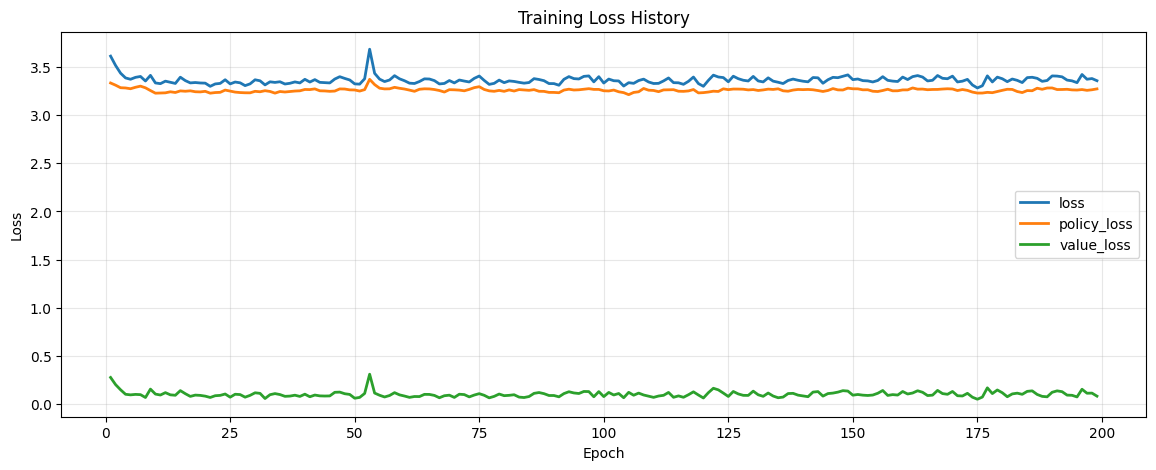

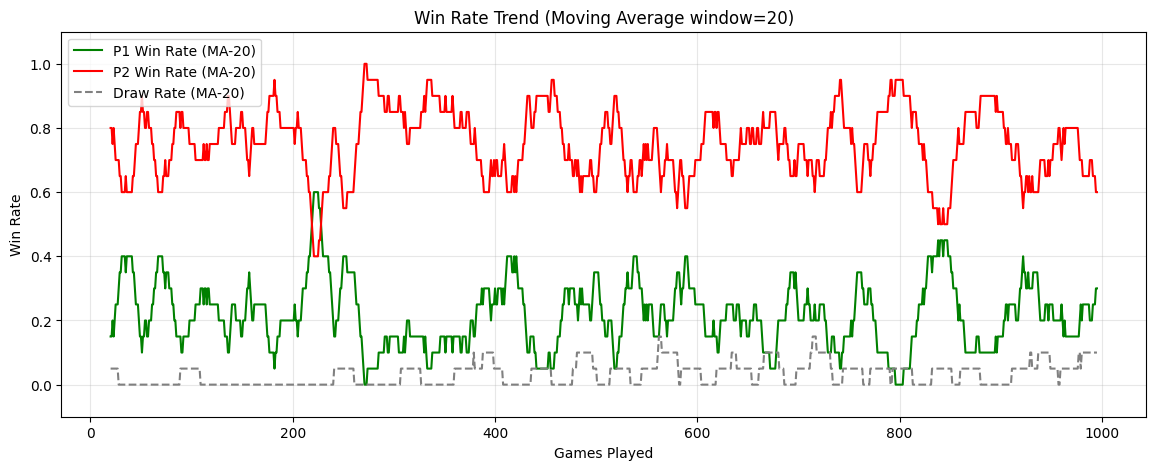

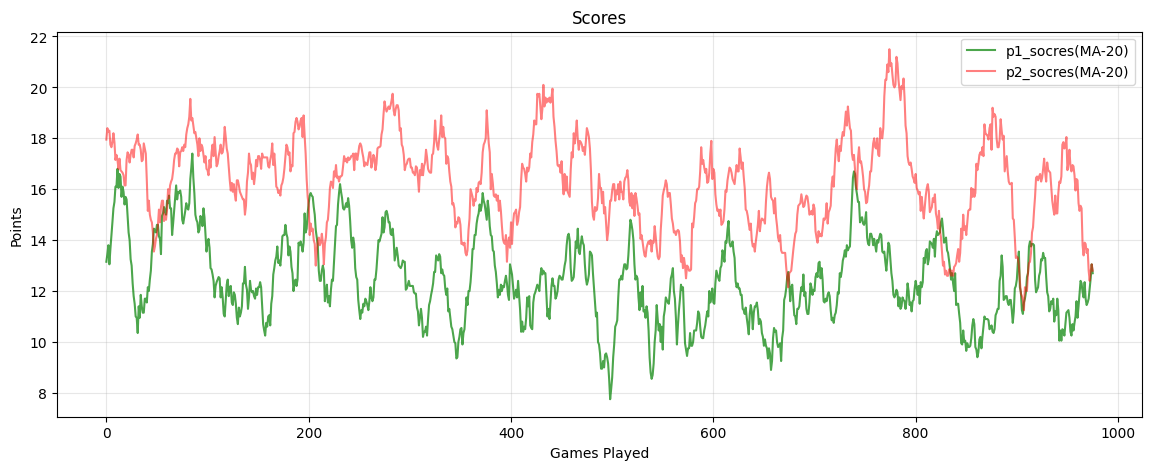

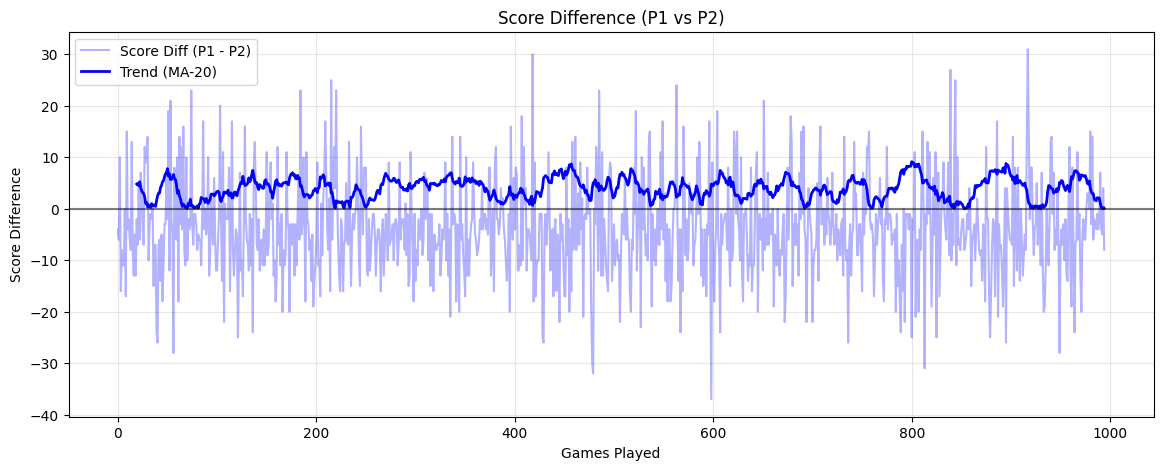


Recent Games:
Game 991: Winner=P1, Score=13-6, Steps=24
Game 992: Winner=P2, Score=14-18, Steps=24
Game 993: Winner=P2, Score=12-17, Steps=24
Game 994: Winner=P1, Score=19-15, Steps=24
Game 995: Winner=P2, Score=6-14, Steps=24


In [4]:
import pickle
import matplotlib.pyplot as plt
import os
import numpy as np

# 設定路徑
history_path = os.path.join(os.getcwd(), 'models', 'training_history.pkl')

if not os.path.exists(history_path):
    print(f"尚未找到訓練紀錄: {history_path}")
    print("請先執行訓練 (Training) 以產生數據。")
else:
    try:
        with open(history_path, 'rb') as f:
            data = pickle.load(f)
            # 相容性檢查：確保數據格式正確
            if len(data) == 3:
                epoch, loss_history, game_record = data
                print(f"已載入訓練紀錄：共 {epoch} Epochs")
            else:
                print("紀錄格式不符，無法分析。")
                epoch, loss_history, game_record = 0, [], []
    except Exception as e:
        print(f"讀取錯誤: {e}")
        loss_history = []
        game_record = []

    # --- 1. 繪製 Loss 曲線 ---
    if loss_history:
        plt.figure(figsize=(14, 5))
        
        # 取得所有可用的 loss key (例如 'loss', 'policy_loss', 'value_loss')
        keys = loss_history[0].keys()
        epochs_range = range(1, len(loss_history) + 1)
        
        for key in keys:
            vals = [x[key] for x in loss_history]
            plt.plot(epochs_range, vals, label=key, linewidth=2)
            
        plt.title('Training Loss History')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    
    # --- 2. 繪製對戰結果分析 ---
    if game_record:
        # 計算移動平均函數
        def moving_average(data, window_size=10):
            return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

        # 提取勝負數據
        p1_wins = [1 if g['winner'] == 'P1' else 0 for g in game_record]
        p2_wins = [1 if g['winner'] == 'P2' else 0 for g in game_record]
        draws = [1 if g['winner'] == 'Draw' else 0 for g in game_record]
        
        window = min(20, len(game_record))
        if window > 1:
            plt.figure(figsize=(14, 5))
            
            x_axis = range(window, len(game_record) + 1)
            
            plt.plot(x_axis, moving_average(p1_wins, window), label=f'P1 Win Rate (MA-{window})', color='green')
            plt.plot(x_axis, moving_average(p2_wins, window), label=f'P2 Win Rate (MA-{window})', color='red')
            plt.plot(x_axis, moving_average(draws, window), label=f'Draw Rate (MA-{window})', color='gray', linestyle='--')
            
            plt.title(f'Win Rate Trend (Moving Average window={window})')
            plt.xlabel('Games Played')
            plt.ylabel('Win Rate')
            plt.legend()
            plt.grid(True, alpha=0.3)
            plt.ylim(-0.1, 1.1)
            plt.show()
        
        # 分別顯示分數
        p1_scores = [g['p1_score'] for g in game_record]
        p2_scores = [g['p2_score'] for g in game_record]
        
        plt.figure(figsize=(14, 5))
        plt.plot(moving_average(p1_scores, 20), alpha=0.7, color='green', label='p1_socres(MA-20)')
        plt.plot(moving_average(p2_scores, 20), alpha=0.5, color='red', label='p2_socres(MA-20)')
        plt.title('Scores')
        plt.xlabel('Games Played')
        plt.ylabel('Points')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        
        # 提取分數差數據
        score_diffs = [g['p1_score'] - g['p2_score'] for g in game_record]
        
        plt.figure(figsize=(14, 5))
        plt.plot(score_diffs, alpha=0.3, color='blue', label='Score Diff (P1 - P2)')
        if len(score_diffs) >= window:
            plt.plot(range(window-1, len(score_diffs)), abs(moving_average(score_diffs, window)), color='blue', linewidth=2, label=f'Trend (MA-{window})')
            
        plt.axhline(y=0, color='black', linestyle='-', alpha=0.5)
        plt.title('Score Difference (P1 vs P2)')
        plt.xlabel('Games Played')
        plt.ylabel('Score Difference')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
        
        # 顯示最近 5 場數據
        print("\nRecent Games:")
        for i, g in enumerate(game_record[-5:]):
            print(f"Game {len(game_record)-4+i}: Winner={g['winner']}, Score={g['p1_score']}-{g['p2_score']}, Steps={g['steps']}")